In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# tryig to set the target variable as the fatal or non fatal accindents in France metropolitan area
#Step 2/ Pre-processing and feature engineering : Deadline Friday, 14th of July
#Following the observations made in the previous step, you will have to clean your dataset and perform the pre-processing steps.
#If necessary, you will have to transform and/or add features and enrich your dataset.
#The objective at the end of this step is to have a dataset ready to perform in-depth analysis and/or modeling using Machine (and Deep) Learning.

In [22]:
df = pd.read_csv("./data/230819_basic_table_for_analysis.csv", index_col=0, low_memory=False)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2509598 entries, 201900000001 to 201800057783
Data columns (total 60 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id_vehicule   float64
 1   num_veh       object 
 2   place         float64
 3   catu          int64  
 4   grav          int64  
 5   sexe          int64  
 6   an_nais       float64
 7   trajet        float64
 8   secu1         float64
 9   secu2         float64
 10  secu3         float64
 11  locp          float64
 12  actp          object 
 13  etatp         float64
 14  secu          float64
 15  an            int64  
 16  mois          int64  
 17  jour          int64  
 18  hrmn          object 
 19  lum           int64  
 20  agg           int64  
 21  int           int64  
 22  atm           float64
 23  col           float64
 24  com           object 
 25  adr           object 
 26  gps           object 
 27  lat           float64
 28  long          float64
 29  dep           int64  
 30  metropo

In [44]:
df[df['metropolitan'] == 1]

,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,...,catv,occutc,obs,obsm,choc,manv,motor,date,is_holiday,holiday
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201900000001,138306524.0,B01,2.0,2,4,2,2002.0,0.0,1.0,0.0,...,7,NaN,0.0,2.0,5.0,23.0,1.0,2019-11-30,False,NaN
201900000001,138306524.0,B01,1.0,1,4,2,1993.0,5.0,1.0,0.0,...,7,NaN,0.0,2.0,5.0,23.0,1.0,2019-11-30,False,NaN
201900000001,138306525.0,A01,1.0,1,1,1,1959.0,0.0,1.0,0.0,...,17,NaN,1.0,0.0,3.0,11.0,1.0,2019-11-30,False,NaN
201900000002,138306523.0,A01,1.0,1,4,2,1994.0,0.0,1.0,0.0,...,7,NaN,4.0,0.0,1.0,0.0,1.0,2019-11-30,False,NaN
201900000003,138306520.0,A01,1.0,1,1,1,1996.0,0.0,1.0,0.0,...,7,NaN,0.0,2.0,1.0,2.0,1.0,2019-11-28,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201800055764,NaN,B01,1.0,1,1,1,1988.0,5.0,NaN,NaN,...,7,0.0,0.0,2.0,6.0,2.0,NaN,2018-12-28,False,NaN
201800055765,NaN,A01,1.0,1,4,1,1989.0,1.0,NaN,NaN,...,2,0.0,0.0,2.0,3.0,11.0,NaN,2018-12-29,False,NaN
201800055765,NaN,B01,1.0,1,1,1,1998.0,5.0,NaN,NaN,...,7,0.0,0.0,2.0,7.0,1.0,NaN,2018-12-29,False,NaN


In [52]:
#Look for percentage of missing values
counts = pd.DataFrame()
counts['percentage_full'] = 100 - round(df.count()/len(df)*100, 2)
counts['metropolitan_only'] = 100 - round(df[df['metropolitan'] == 1].count()/len(df[df['metropolitan'] == 1])*100,2)
counts['non_metropolitan'] = 100 - round(df[df['metropolitan'] == 0].count()/len(df[df['metropolitan'] == 0])*100,2)
print(counts)
counts.to_csv('./data/230827_percentage.csv')

              percentage_full  metropolitan_only  non_metropolitan
id_vehicule             85.36              85.65             77.45
num_veh                  0.00               0.00              0.00
place                    4.91               4.91              4.67
catu                     0.00               0.00              0.00
grav                     0.00               0.00              0.00
sexe                     0.00               0.00              0.00
an_nais                  0.22               0.22              0.30
trajet                   0.02               0.02              0.01
secu1                   85.36              85.65             77.45
secu2                   85.36              85.65             77.45
secu3                   85.36              85.65             77.45
locp                     2.25               2.24              2.30
actp                     2.25               2.25              2.30
etatp                    2.25               2.25              

In [3]:
df['an'].describe()

count    2.509598e+06
mean     2.012251e+03
std      4.959530e+00
min      2.005000e+03
25%      2.008000e+03
50%      2.012000e+03
75%      2.017000e+03
max      2.021000e+03
Name: an, dtype: float64

In [4]:
# TS: The following code is not necessary. We have only M and NaN, while we cannot impute reliable impute data in the NaNs

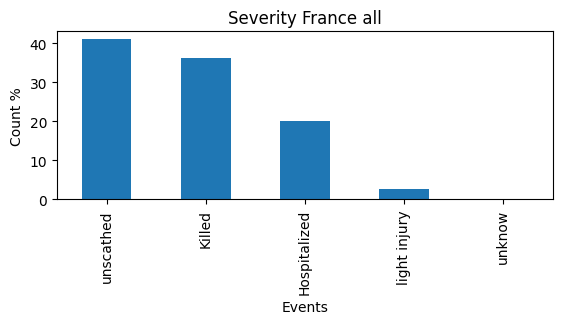

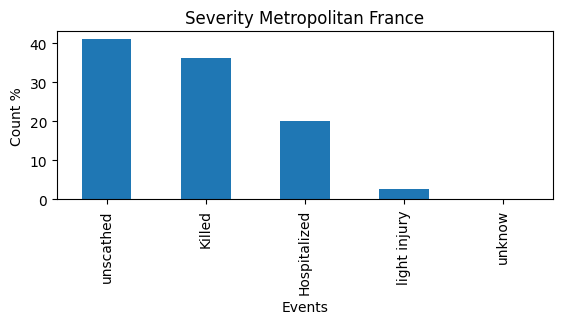

In [5]:
# exploring a possible target variable
#severity
event_counts = df['grav'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France all')
# Display the plot
plt.show()



event_counts_M = df['grav'].value_counts()
event_percentages_M = (event_counts_M / event_counts_M.sum()) * 100
plt.subplot(2,1,2)
event_percentages.plot.bar()
#labels = ['unscathed','Killed','Hospitalized','light injury']
labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages_M)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity Metropolitan France')
# Display the plot
plt.show()


In [6]:
# create a new variable for the severity ['Grav'] of accidents ( fatal, non-fatal) as a possible target variable
# a new binary variable 'fatality' based on 'severity' named fatal
df['fatal'] = np.where(df['grav'].isin([1, 3, 4]), 0, 1)



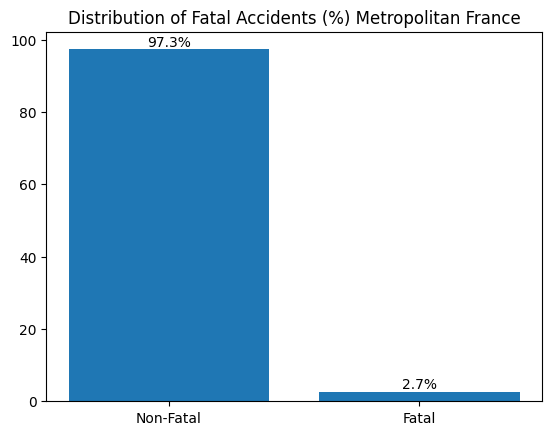

In [7]:
# explorig the new variable 
percentage_distribution = df['fatal'].value_counts(normalize=True) * 100

# Create a bar plot
plt.bar(percentage_distribution.index, percentage_distribution.values)

# Set the x-axis tick labels
plt.xticks(percentage_distribution.index)
plt.xticks(percentage_distribution.index, ['Non-Fatal', 'Fatal'])
plt.title('Distribution of Fatal Accidents (%) Metropolitan France')
# Show labels on top of bars
for i, v in enumerate(percentage_distribution.values):
    plt.text(i, v, f"{v:.1f}%", ha='center', va='bottom')

plt.show()

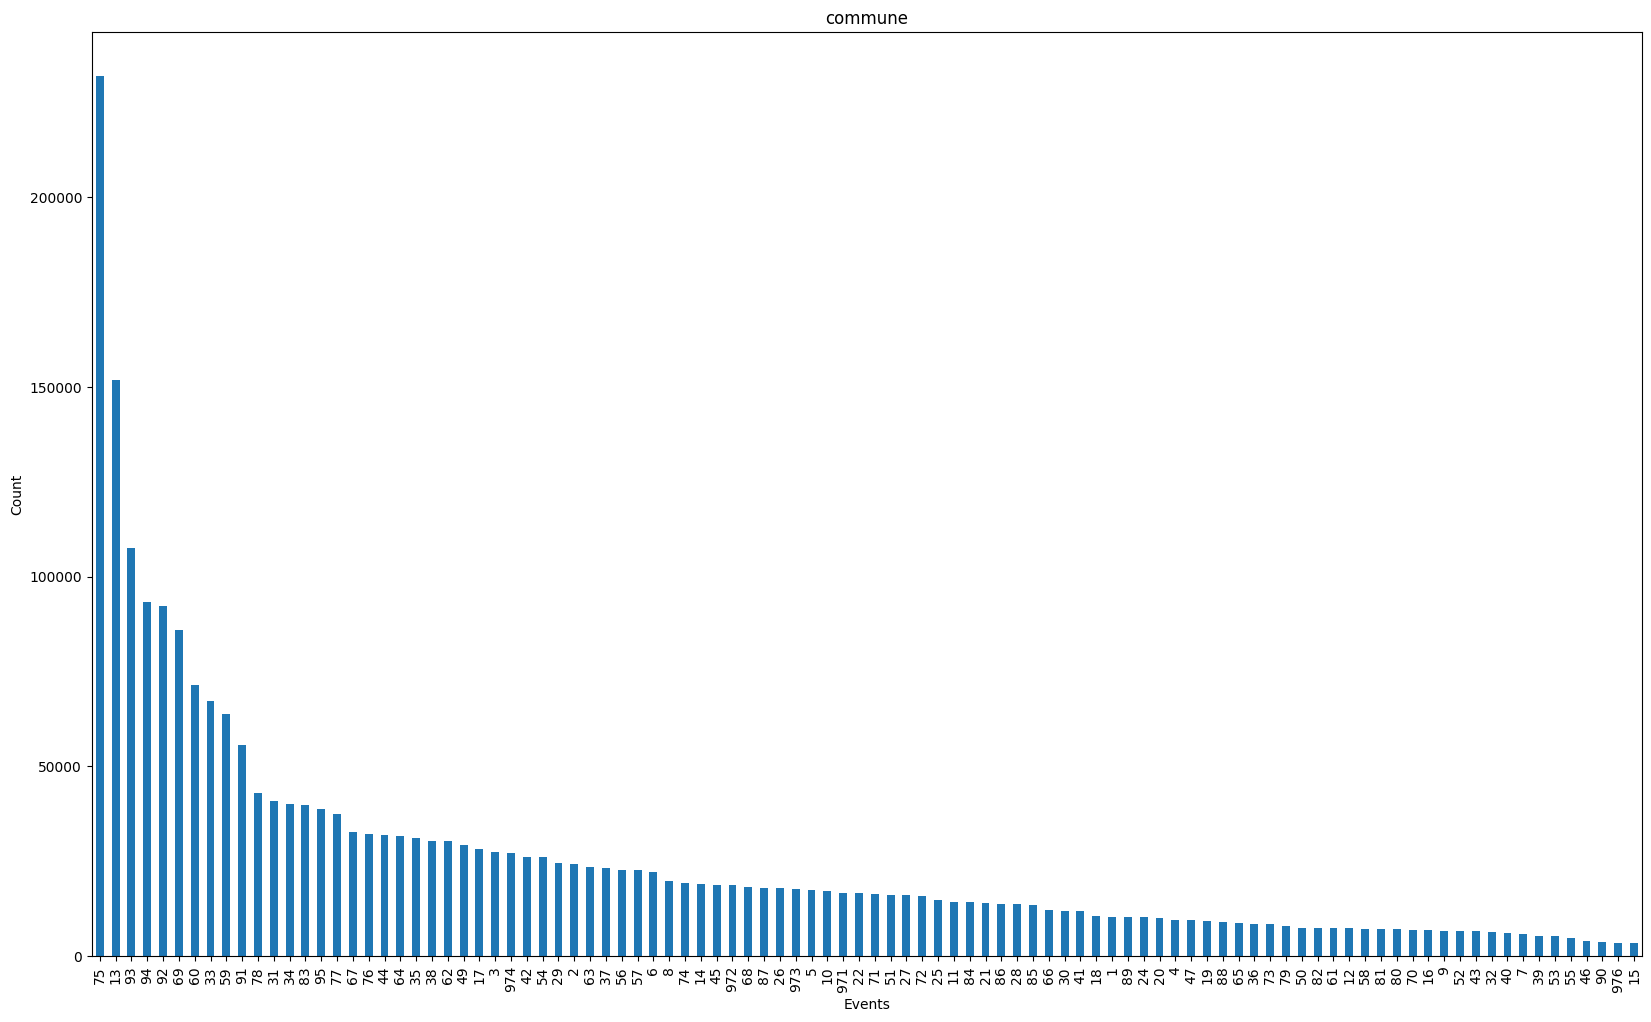

In [8]:
plt.figure(figsize=(20,12))
event_counts = df['dep'].value_counts()
event_counts_filtered = event_counts[event_counts > 3000]

event_counts_filtered.plot.bar()

plt.xticks(rotation=90)
plt.xlabel('Events')
plt.ylabel('Count')
plt.title('commune')
# Display the plot
plt.show()

In [9]:
df['jour'].describe()

count    2.509598e+06
mean     1.562212e+01
std      8.752002e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.600000e+01
75%      2.300000e+01
max      3.100000e+01
Name: jour, dtype: float64

In [10]:
df.info()
#new



<class 'pandas.core.frame.DataFrame'>
Index: 2509598 entries, 201900000001 to 201800057783
Data columns (total 61 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id_vehicule   float64
 1   num_veh       object 
 2   place         float64
 3   catu          int64  
 4   grav          int64  
 5   sexe          int64  
 6   an_nais       float64
 7   trajet        float64
 8   secu1         float64
 9   secu2         float64
 10  secu3         float64
 11  locp          float64
 12  actp          object 
 13  etatp         float64
 14  secu          float64
 15  an            int64  
 16  mois          int64  
 17  jour          int64  
 18  hrmn          object 
 19  lum           int64  
 20  agg           int64  
 21  int           int64  
 22  atm           float64
 23  col           float64
 24  com           object 
 25  adr           object 
 26  gps           object 
 27  lat           float64
 28  long          float64
 29  dep           int64  
 30  metropo

In [11]:
df['date']

Num_Acc
201900000001    2019-11-30
201900000001    2019-11-30
201900000001    2019-11-30
201900000002    2019-11-30
201900000003    2019-11-28
                   ...    
201800057781    2018-12-22
201800057782    2018-12-23
201800057782    2018-12-23
201800057783    2018-12-28
201800057783    2018-12-28
Name: date, Length: 2509598, dtype: object

In [12]:
df['year'] = df['an']

In [13]:
df.index

Index([201900000001, 201900000001, 201900000001, 201900000002, 201900000003,
       201900000003, 201900000003, 201900000003, 201900000004, 201900000004,
       ...
       201800057778, 201800057779, 201800057779, 201800057780, 201800057781,
       201800057781, 201800057782, 201800057782, 201800057783, 201800057783],
      dtype='int64', name='Num_Acc', length=2509598)

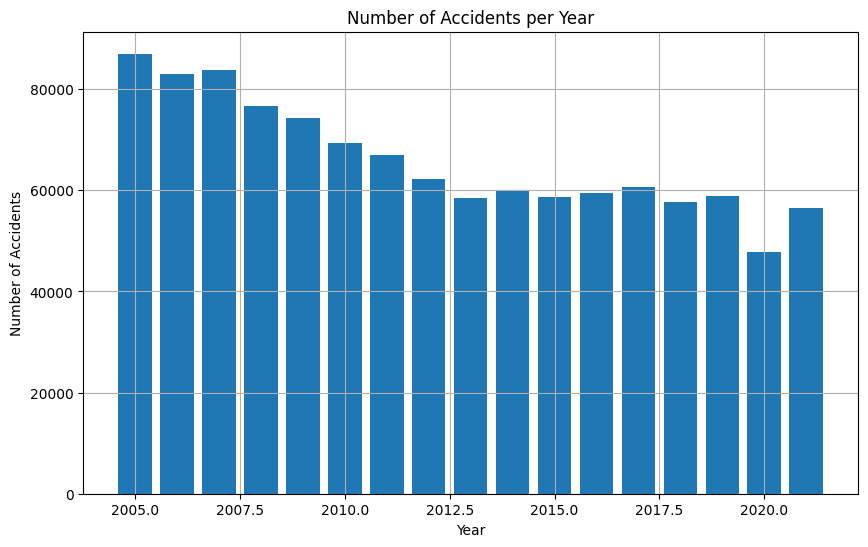

In [14]:
# We need to aggregate the index first
accidents_per_year = pd.DataFrame(df['year'].groupby(df.index).value_counts()).index.get_level_values(1).value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_year.index, accidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.grid(True)
plt.show()

In [15]:
accidents_per_year

year
2005    87026
2006    82993
2007    83850
2008    76767
2009    74409
2010    69379
2011    66974
2012    62250
2013    58397
2014    59854
2015    58654
2016    59432
2017    60701
2018    57783
2019    58840
2020    47744
2021    56518
Name: count, dtype: int64

The next cell is a wrong aggregation, because the index is multiple and not unequivocal.

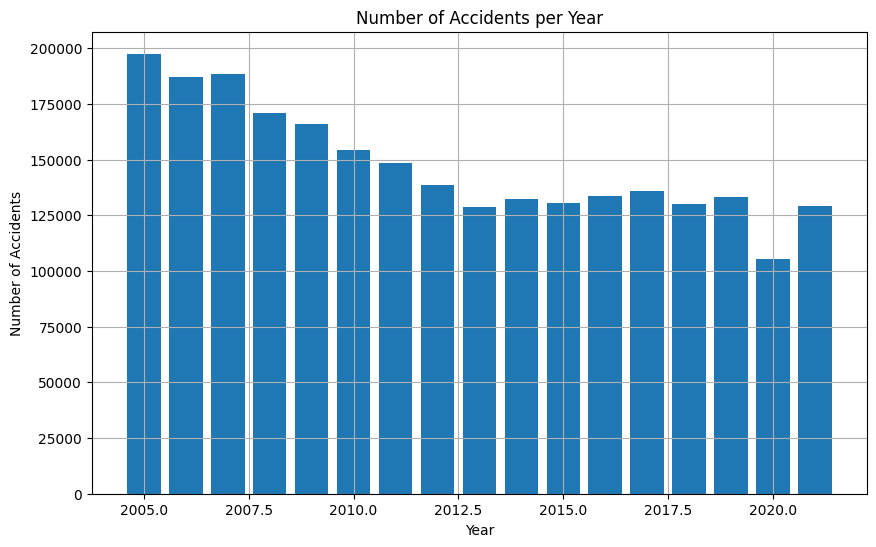

In [16]:
accidents_per_year = df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_year.index, accidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.grid(True)
plt.show()

In [17]:
accidents_per_year

year
2005    197496
2006    187080
2007    188446
2008    170956
2009    165962
2010    154192
2011    148543
2012    138628
2013    128694
2014    132186
2015    130378
2016    133422
2017    136021
2018    130169
2019    132977
2020    105295
2021    129153
Name: count, dtype: int64

In [18]:
df['year'] = df['date_1'].dt.year # new

# Group the data by year and count the occurrences
accidents_per_year = df['year'].value_counts().sort_index()

# Plot the number of accidents per year
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_year.index, accidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.grid(True)
plt.show()

KeyError: 'date_1'

In [ ]:
accidents_per_year
# this is strange for 2019,2020 and 2021


In [ ]:
fatal_counts = df[df['fatal'] == 1]['year'].value_counts().sort_index()

# Group the data by year and count the occurrences for non-fatal accidents
non_fatal_counts = df[df['fatal'] == 0]['year'].value_counts().sort_index()

# Create subplots for fatal and non-fatal accidents
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the number of fatal accidents per year
ax1.bar(fatal_counts.index, fatal_counts.values)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Fatal Accidents')
ax1.set_title('Number of Fatal Accidents per Year')

# Plot the number of non-fatal accidents per year
ax2.bar(non_fatal_counts.index, non_fatal_counts.values)
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Non-Fatal Accidents')
ax2.set_title('Number of Non-Fatal Accidents per Year')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



In [ ]:
fatal_counts = df[df['fatal'] == 1]['year'].value_counts().sort_index()

# Plot the time series of fatal accidents per year
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Fatal Accidents')
plt.title('Time Series of Fatal Accidents per Year')
plt.grid(True)
plt.show()

In [ ]:
fatal_counts = df[df['fatal'] == 0]['year'].value_counts().sort_index()

# Plot the time series of fatal accidents per year
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of non Fatal Accidents')
plt.title('Time Series of non Fatal Accidents per Year')
plt.grid(True)
plt.show()

In [ ]:
#time series of fatal accidents

fatal_counts = df[df['fatal'] == 1]['date_1'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Datetime')
plt.ylabel('Number of Fatal Accidents')
plt.title('Time Series of Fatal Accidents')
plt.grid(True)
plt.show()

In [ ]:
#time series of non fatal accidents
fatal_counts = df[df['fatal'] == 0]['date_1'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Datetime')
plt.ylabel('Number of non Fatal Accidents')
plt.title('Time Series of non Fatal Accidents')
plt.grid(True)
plt.show()



In [ ]:
#Filter the DataFrame for fatal accidents
non_fatal_counts = df[df['fatal'] == 1]['date_1'].value_counts().sort_index()

# Calculate the moving average with a window size =  12 months
moving_average = non_fatal_counts.rolling(window=12).mean()

# Plot the time series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(non_fatal_counts.index, non_fatal_counts.values, marker='o', label='Non-Fatal Accidents')
plt.plot(moving_average.index, moving_average.values, label='Moving Average (12 months)')
plt.xlabel('Datetime')
plt.ylabel('Number of Fatal Accidents')
plt.title('Time Series of Fatal Accidents with Moving Average')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Filter the DataFrame for non-fatal accidents
non_fatal_counts = df[df['fatal'] == 0]['date_1'].value_counts().sort_index()

# Calculate the moving average with a window size of your choice (e.g., 12 months)
moving_average = non_fatal_counts.rolling(window=12).mean()

# Plot the time series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(non_fatal_counts.index, non_fatal_counts.values, marker='o', label='Non-Fatal Accidents')
plt.plot(moving_average.index, moving_average.values, label='Moving Average (12 months)')
plt.xlabel('Datetime')
plt.ylabel('Number of Non-Fatal Accidents')
plt.title('Time Series of Non-Fatal Accidents with Moving Average')
plt.grid(True)
plt.legend()
plt.show()
# strange increase